In [1]:
import numpy as np
from pylab import *
%matplotlib notebook
import glob
import glob
from craco.cardcap import NCHAN, NFPGA
from craco import cardcap
from craco.cardcapmerger import CcapMerger
%load_ext autoreload
%autoreload 2



In [2]:
path = '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f?.fits' # 1644
#path = '/data/big/craco/SB048710/scans/00/20230303004136/*b02*c01*' # 1809
files = sorted(glob.glob(path))
files

['/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f1.fits',
 '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits',
 '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f3.fits',
 '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f4.fits',
 '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f5.fits',
 '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f6.fits']

In [3]:
m = CcapMerger(files)

/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f1.fits was not closed correctly. Estimating ngroups from size=1403799808 datalen=1403788288 len=374144
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')
/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits was not closed correctly. Estimating ngroups from size=1404760320 datalen=1404748800 len=374400
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')
/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f3.f

In [4]:
out, block = next(m.block_iter(beam=0))

/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapmerger.py:58: RuntimeWarning: overflow encountered in ulong_scalars
  log.debug(f'MISS expected frame_id={frame_id} current={curr_frameid} fidoffset ={fidoff} last_frameid={last_frameid} curr-last={int(curr_frameid) - int(last_frameid)} expected-curr={frame_id-curr_frameid} BAT curr-last={curr_bat - last_bat}')


In [5]:
block.shape

(24, 1, 64, 465, 1, 2)

<IPython.core.display.Javascript object>


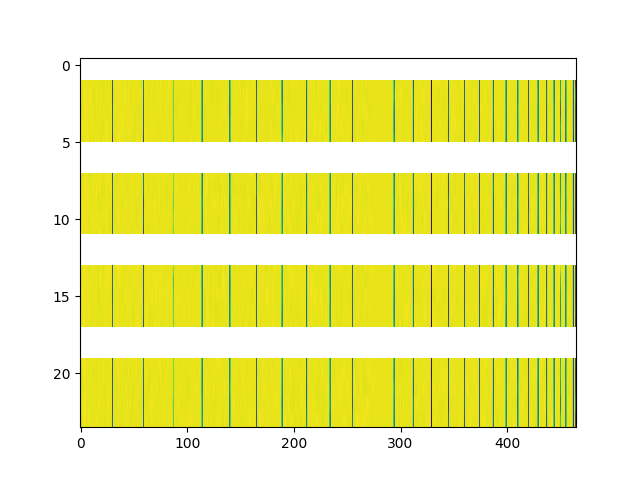

In [6]:
figure()
imshow(block[:,0,:,:,0,0].mean(axis=1), aspect='auto')

In [7]:
pktiter = m.packet_iter(beam=0)
packets, fids = next(pktiter)
packets2, fids2 = next(pktiter)

In [8]:
packets[1][1]['channel_number']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [9]:
packets[1][1]['frame_id']

array([407021600, 407021664, 407021728, 407021792, 407021856, 407021920,
       407021984, 407022048, 407022112, 407022176, 407022240, 407022304,
       407022368, 407022432, 407022496, 407022560, 407022624, 407022688,
       407022752, 407022816, 407022880, 407022944, 407023008, 407023072,
       407023136, 407023200, 407023264, 407023328, 407023392, 407023456,
       407023520, 407023584, 407021600, 407021664, 407021728, 407021792,
       407021856, 407021920, 407021984, 407022048, 407022112, 407022176,
       407022240, 407022304, 407022368, 407022432, 407022496, 407022560,
       407022624, 407022688, 407022752, 407022816, 407022880, 407022944,
       407023008, 407023072, 407023136, 407023200, 407023264, 407023328,
       407023392, 407023456, 407023520, 407023584, 407021600, 407021664,
       407021728, 407021792, 407021856, 407021920, 407021984, 407022048,
       407022112, 407022176, 407022240, 407022304, 407022368, 407022432,
       407022496, 407022560, 407022624, 407022688, 

In [10]:
[pkt[0] for pkt in packets]

[407021600, 407021600, 407021600, 407021600, 407021600, 407021600]

In [11]:
[pkt[1] is None for pkt in packets]

[True, False, False, False, False, False]

In [12]:
from craco.card_averager import Averager
nbeam = 1
nant = 30
nc = 24
nt = 64
npol = 1
vis_fscrunch = 6
vis_tscrunch = 1
dummy_packet = np.zeros_like(packets[1][1])
REAL_DTYPE = np.float32
CPLX_DTYPE = np.complex64
averager = Averager(nbeam, nant, nc, nt, npol, 
                    vis_fscrunch, vis_tscrunch, 
                    REAL_DTYPE, CPLX_DTYPE, dummy_packet)
averager.output.dtype

/data/seren-01/fast/ban115/build/craco-python/src/craco/card_averager.py:274: RuntimeWarning: divide by zero encountered in true_divide
  scale = 1/stdev


dtype([('ics', '<f4', (64, 24)), ('cas', '<f4', (64, 24)), ('vis', '<c8', (465, 4, 64))])

In [13]:
averager.output.shape

(1,)

In [14]:
# initial rescal setting version
out1 = averager.accumulate_packets(packets).copy() # default 0,1 rescaling applied
out2 = averager.accumulate_packets(packets2).copy() # rescale should be applied here
out = out2

/data/seren-01/fast/ban115/build/craco-python/src/craco/card_averager.py:265: RuntimeWarning: divide by zero encountered in true_divide
  variance = m2 / count #ill produce NAN where count=0
/data/seren-01/fast/ban115/build/craco-python/src/craco/card_averager.py:265: RuntimeWarning: invalid value encountered in true_divide
  variance = m2 / count #ill produce NAN where count=0


In [15]:
out['cas'].shape

(1, 64, 24)

In [16]:
out['cas'][0,0,:]

array([  0.       ,  50.3821   , -20.188175 ,  -5.5333676,  24.277527 ,
         0.       ,   0.       ,   2.675061 ,  25.449022 ,   8.814802 ,
        31.477982 ,   0.       ,   0.       ,  24.516981 ,  13.061963 ,
       -14.040151 ,  15.645996 ,   0.       ,   0.       ,   4.2141933,
         4.0543113, -23.31916  ,   6.937458 ,   0.       ], dtype=float32)

In [17]:
averager.rescale_stats.shape

(1, 24, 465, 1, 2)

<IPython.core.display.Javascript object>


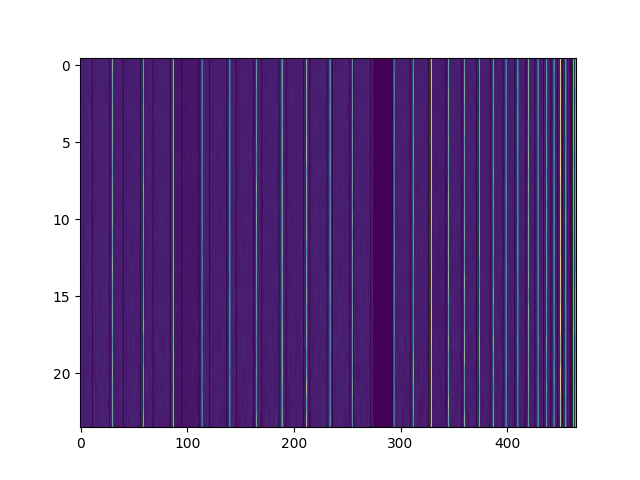

In [18]:
figure()
imshow(averager.rescale_stats[0,:,:,0,0], aspect='auto')

In [19]:
averager.rescale_scales.shape


(1, 24, 465, 1, 2)

In [20]:
np.any(np.isinf(averager.rescale_scales))

False

<IPython.core.display.Javascript object>


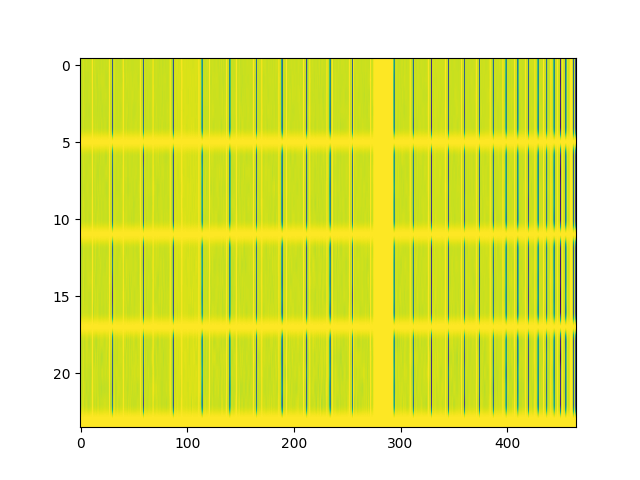

In [21]:
figure()
imshow(averager.rescale_scales[0,:,:,0,0], aspect='auto')

<IPython.core.display.Javascript object>


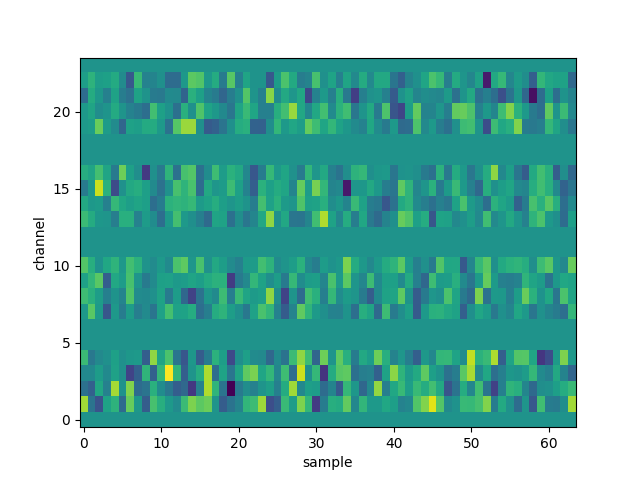

Text(0, 0.5, 'channel')

In [22]:
figure()
imshow(out[0]['cas'].T, origin='lower', aspect='auto', interpolation='none')
xlabel('sample')
ylabel('channel')

<IPython.core.display.Javascript object>


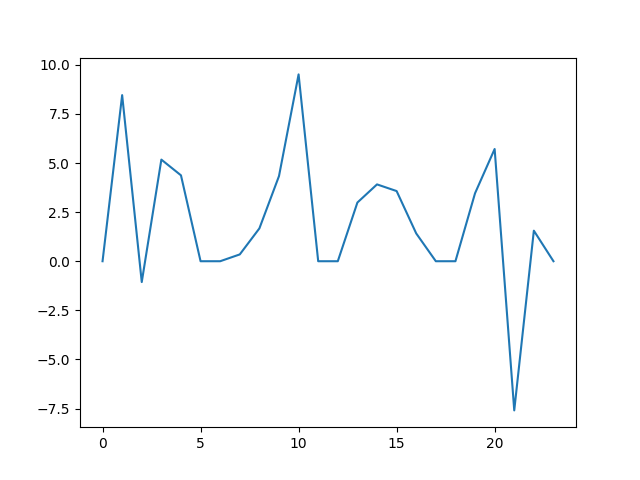

In [23]:
figure()
plot(out[0]['cas'].mean(axis=0))

In [24]:
len(packets)

6

In [25]:
valid = np.array([pkt[1] is not None for pkt in packets], dtype=bool)
valid 

array([False,  True,  True,  True,  True,  True])

In [26]:
from numba.typed import List

data = List()
[data.append(averager.dummy_packet if pkt[1] is None else pkt[1]) for pkt in packets]


[None, None, None, None, None, None]

In [27]:
pkt = packets[4]
pkt[1] is None

False

In [28]:
d = pkt[1]

In [29]:
d.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (2, 465, 1, 2))])

In [30]:
d['data'].shape

(128, 2, 465, 1, 2)

<IPython.core.display.Javascript object>


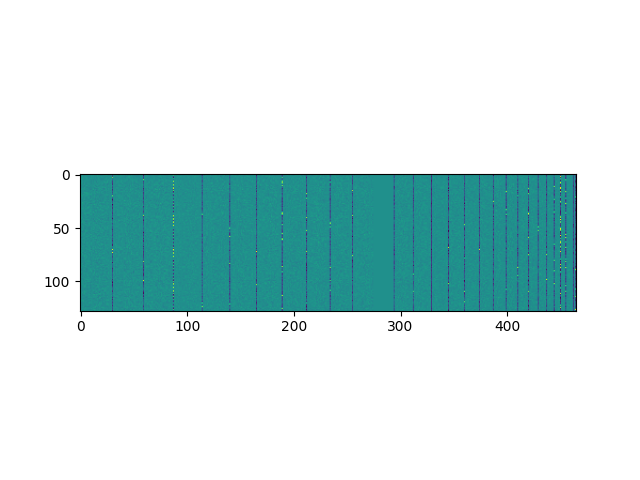

In [31]:
figure()
imshow(d['data'][:,0,:,0,0])

In [32]:
averager.rescale_stats.shape

(1, 24, 465, 1, 2)

<IPython.core.display.Javascript object>


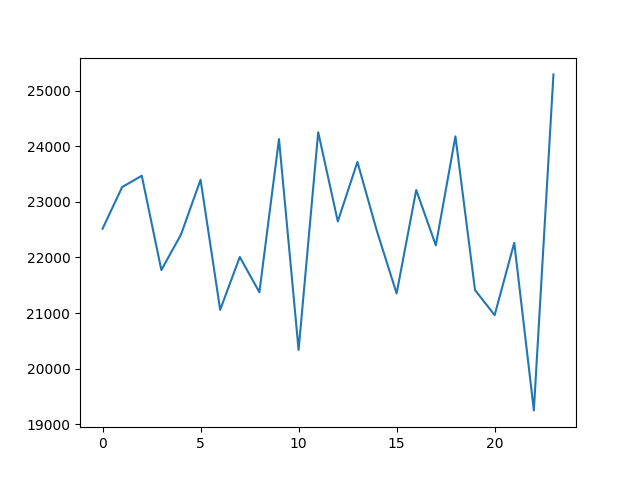

In [33]:
figure()
plot(averager.rescale_stats[0,:,0,0,0].T)

In [34]:
fin = '/data/seren-01/big/craco/SB048709/scans/00/20230303003206/results/rescale/b02/c01/rescale_001.npy.npz'
rsdata = np.load(fin)

In [35]:
list(rsdata.keys())

['mean', 'count', 'scount', 'variance', 'stdev', 'offset', 'scale']

In [36]:
rsdata['mean'].shape

(1, 24, 465, 1)

In [37]:
rsdata['count'][0,:,0,0]

array([  0, 256, 256, 256, 256, 256,   0, 256, 256, 256, 256, 256,   0,
       256, 256, 256, 256, 256,   0, 256, 256, 256, 256, 256], dtype=int32)

In [38]:
rsdata['scount']

array([  0, 256, 256, 256, 256, 256], dtype=int32)

<IPython.core.display.Javascript object>


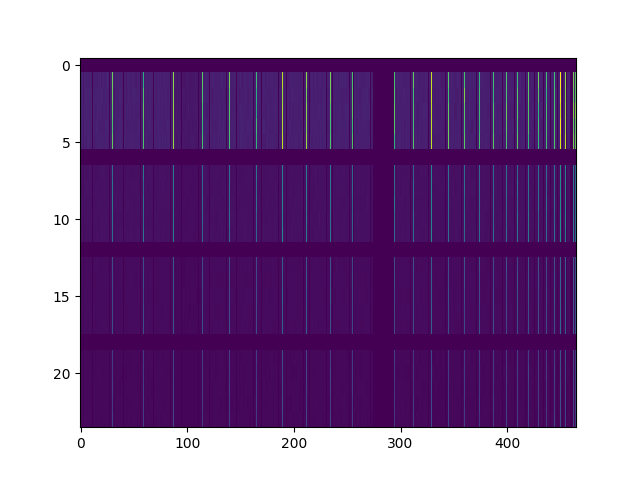

In [39]:
figure()
imshow(rsdata['mean'][0,:,:,0], aspect='auto', interpolation='none')

<IPython.core.display.Javascript object>


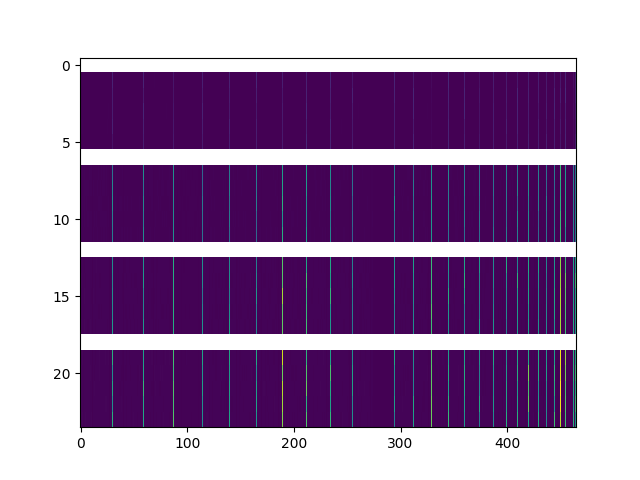

In [40]:
figure()
imshow(rsdata['variance'][0,:,:,0], aspect='auto', interpolation='none')

In [41]:
rsdata['variance'][0,0]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [42]:
pkt = packets[1][1]

In [43]:
pkt.shape

(128,)

In [44]:
pkt.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (2, 465, 1, 2))])

In [45]:
pkt['beam_number']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [46]:
pkt['channel_number']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [47]:
pkt['sample_number']

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,  1,  3,
        5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37,
       39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,  1,  3,  5,  7,
        9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
       43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,  1,  3,  5,  7,  9, 11,
       13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45,
       47, 49, 51, 53, 55, 57, 59, 61, 63], dtype=uint8)

In [48]:
pkt['fpga_id']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [49]:
((pkt['frame_id'] - pkt['frame_id'][0])/64.0).reshape(4,-1)

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.]])

In [50]:
((pkt['bat'] - pkt['bat'][0])).reshape(4,-1)

array([[    0,    23,    47,    71,    94,   118,   142,   165,   189,
          212,   236,   260,   283,   307,   331,   354,   378,   401,
          425,   449,   472,   496,   520,   543,   567,   590,   614,
          638,   661,   685,   709,   738],
       [24381, 24404, 24428, 24452, 24475, 24499, 24523, 24546, 24570,
        24593, 24617, 24641, 24664, 24688, 24712, 24735, 24759, 24782,
        24806, 24830, 24853, 24877, 24901, 24924, 24948, 24971, 24995,
        25019, 25042, 25066, 25090, 25119],
       [48762, 48786, 48809, 48833, 48856, 48880, 48904, 48927, 48951,
        48974, 48998, 49022, 49045, 49069, 49093, 49116, 49140, 49163,
        49187, 49211, 49234, 49258, 49282, 49305, 49329, 49352, 49376,
        49400, 49423, 49447, 49471, 49500],
       [73143, 73166, 73190, 73214, 73237, 73261, 73285, 73308, 73332,
        73355, 73379, 73403, 73426, 73450, 73474, 73497, 73521, 73544,
        73568, 73592, 73615, 73639, 73663, 73686, 73710, 73733, 73757,
        73781, 7

In [51]:
f = cardcap.CardcapFile('/data/fast/craco/SB048356/scans/00/20230220040455/ccap_b02_c01+f1.fits')

/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/fast/craco/SB048356/scans/00/20230220040455/ccap_b02_c01+f1.fits was not closed correctly. Estimating ngroups from size=1192898560 datalen=1192887040 len=317933
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')


In [52]:
pkts = next(f.frame_iter())

In [53]:
pkts.dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (2, 465, 1, 2))])

In [54]:
pkts.shape

(4608,)

<IPython.core.display.Javascript object>


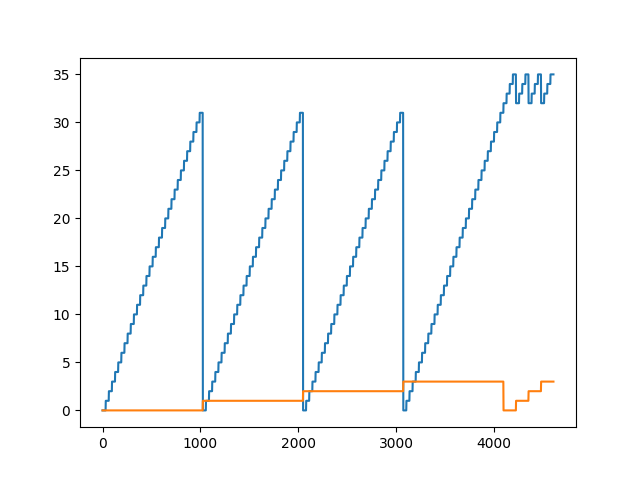

In [55]:
figure()
plot(pkts['beam_number'])

In [56]:
plot(pkts['channel_number'])

<IPython.core.display.Javascript object>


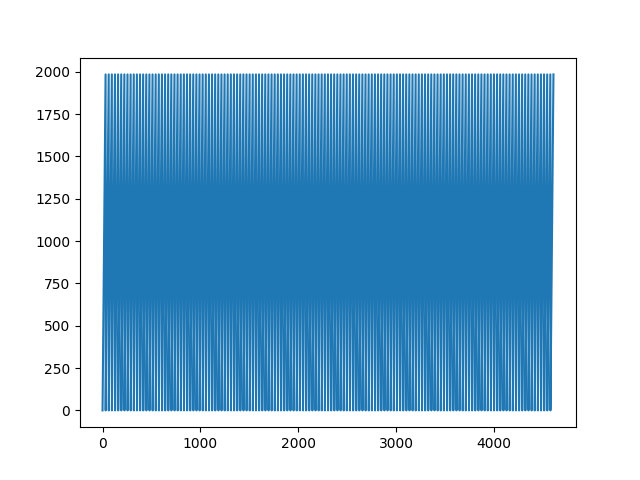

In [57]:
figure()
plot(pkts['frame_id'] - pkts['frame_id'][0])

In [58]:
mask = pkts['beam_number'] == 0

In [59]:
pktb0 = pkts[mask]

<IPython.core.display.Javascript object>


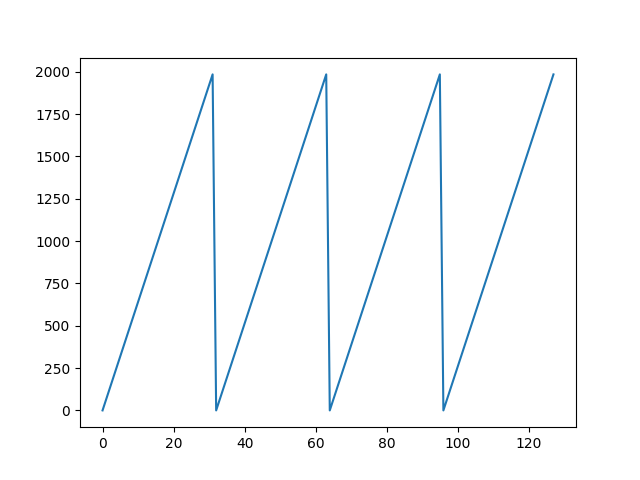

In [60]:
figure()
plot(pktb0['frame_id'] - pktb0['frame_id'][0])

In [61]:
f2 = cardcap.CardcapFile(files[1])

/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits was not closed correctly. Estimating ngroups from size=1404760320 datalen=1404748800 len=374400
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')


In [62]:
pkt2 = next(f2.frame_iter())

In [63]:
pkt2['channel_number']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

<IPython.core.display.Javascript object>


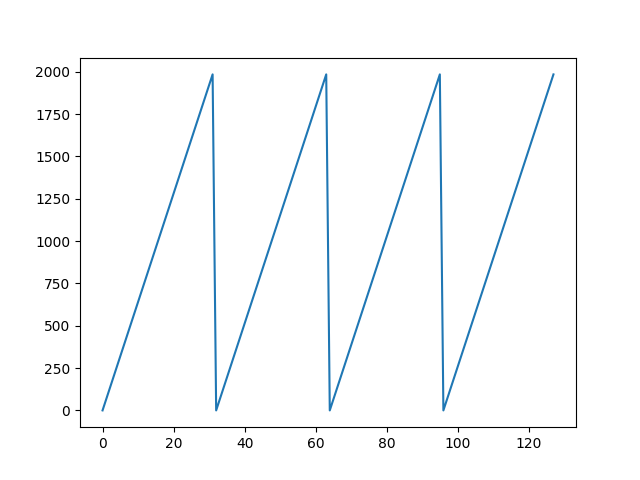

In [64]:
figure()
plot(pkt2['frame_id'] - pkt2['frame_id'][0])

In [65]:
packets[1][1]['frame_id'] - pkt2['frame_id']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint64)

In [66]:
pkt2['data'].shape


(128, 2, 465, 1, 2)

In [67]:
packets[1][1]['data'].shape

(128, 2, 465, 1, 2)

In [68]:
np.all(pkt2['data'][33,:,:,:,:] == packets[1][1]['data'][33,:,:,:,:])

True

In [69]:
m.ccap[1].fname

'/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits'

In [70]:
f2.fname

'/data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits'

In [71]:
f2.fname == m.ccap[1].fname

True

In [72]:
m.frame_id0

/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f1.fits was not closed correctly. Estimating ngroups from size=1403799808 datalen=1403788288 len=374144
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')
/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f2.fits was not closed correctly. Estimating ngroups from size=1404760320 datalen=1404748800 len=374400
  warnings.warn(f'CCAP file {self.fname} was not closed correctly. Estimating ngroups from size={nbytes} datalen={datalen} len={ngroups}')
/data/seren-01/fast/ban115/build/craco-python/src/craco/cardcapfile.py:365: UserWarning: CCAP file /data/seren-01/big/craco/SB048709/scans/00/20230303003206/ccap_b02_c01+f3.f

407021600

In [73]:
pkt2b0 = next(f2.frame_iter(beam=0))

In [74]:
pkt2b0['channel_number']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

<IPython.core.display.Javascript object>


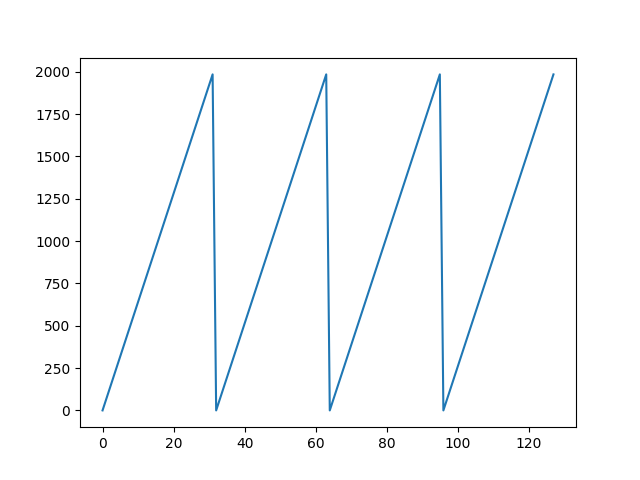

In [75]:
figure()
plot(pkt2b0['frame_id'] - pkt2b0['frame_id'][0])